In [3]:
#Desafio de Inferencia Analise Bivariada - Importaçao das bibliotecas
import pandas as pd
import seaborn as srn
import numpy as np
import statistics  as sts
import matplotlib.pyplot as plt

In [4]:
Df2 = pd.read_csv('DesAnaliseUni.csv')
Df2

,Unnamed: 0,Unnamed: 0.1,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,...,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp,Etnia,Graderenci_Pag
0,0,0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Sem Sintomas,Mexicano-americano,Aderencia baixa
1,1,1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas,Outro,Aderencia adequada
2,2,2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas,Mexicano-americano,Aderencia acima
3,3,3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas,Mexicano-americano,Aderencia acima
4,4,4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas,Negro não-hispanico,Aderencia acima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,5329,5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,Sem Sintomas,Outro-hispanico,Aderencia baixa
5330,5330,5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,...,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,Sintomas Moderados,Branco não-hispanico,Aderencia adequada
5331,5331,5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,Sem Sintomas,Outro,Aderencia adequada
5332,5332,5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,Sem Sintomas,Mexicano-americano,Aderencia baixa


In [19]:
# dropando a coluna ID
Df2 = Df2.drop('Unnamed: 0',axis=1)

In [22]:
Df2 = Df2.drop('Unnamed: 0.1',axis=1)
Df2.head(10)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp,Etnia,Graderenci_Pag
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Sem Sintomas,Mexicano-americano,Aderencia baixa
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas,Outro,Aderencia adequada
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas,Mexicano-americano,Aderencia acima
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas,Mexicano-americano,Aderencia acima
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas,Negro não-hispanico,Aderencia acima
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,Sintomas Leves,Mexicano-americano,Aderencia acima
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.209888,6.747360,0.000000,7.473184,6.573559,37.388008,0.0,Sem Sintomas,Negro não-hispanico,Aderencia acima
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.780404,0.000000,5.138144,5.601160,4.677064,41.001689,0.0,Sem Sintomas,Mexicano-americano,Aderencia baixa
8,31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.660037,9.368343,9.253592,10.000000,8.797673,71.671972,1.0,Sem Sintomas,Mexicano-americano,Aderencia acima
9,31151,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.805860,9.298090,10.000000,6.738039,0.000000,47.002405,3.0,Sem Sintomas,Outro,Aderencia baixa


In [55]:
# Agrupamento dos dados baseado no atributo 'RIAGENDR/phq9', contando e somando os registros
agrupGen = Df2.groupby(['RIAGENDR'])['phq9'].sum()
agrupGen


RIAGENDR
1    5411.0
2    7912.0
Name: phq9, dtype: float64

<AxesSubplot:xlabel='RIAGENDR'>

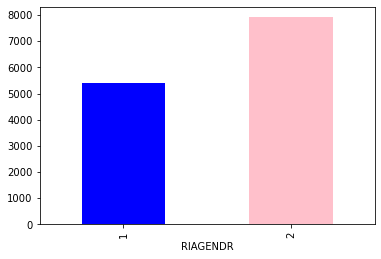

In [41]:
# Gráfico de barras
agrupGen.plot.bar(color = ['blue','pink'])

In [93]:
# Agrupamento dos dados baseado no atributo 'RIDAGEYR/phq9', contando e somando os registros
agrupIdade = Df2.groupby(['RIDAGEYR','RIAGENDR'])['phq9'].sum()
agrupIdade


RIDAGEYR  RIAGENDR
Adult     1           1687.0
          2           2855.0
MidAge    1           2086.0
          2           3053.0
Senior    1           1353.0
          2           1589.0
Name: phq9, dtype: float64

<AxesSubplot:xlabel='RIDAGEYR,RIAGENDR'>

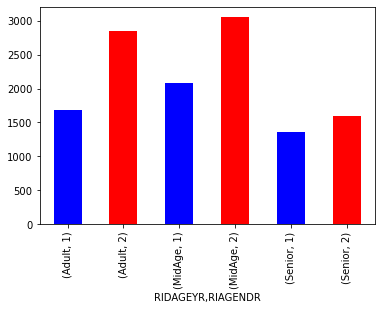

In [95]:
# Gráfico de barras
agrupIdade.plot.bar(color = ['blue','red'])

In [98]:
# Agrupamento dos dados baseado no atributo 'RIDAGEYR/phq9', contando e somando os registros
agrupEtnia = Df2.groupby(['Etnia'])['phq9'].sum()
agrupEtnia


Etnia
Branco não-hispanico    2834.0
Mexicano-americano      6112.0
Negro não-hispanico      501.0
Outro                   3343.0
Outro-hispanico          533.0
Name: phq9, dtype: float64

<AxesSubplot:xlabel='Etnia'>

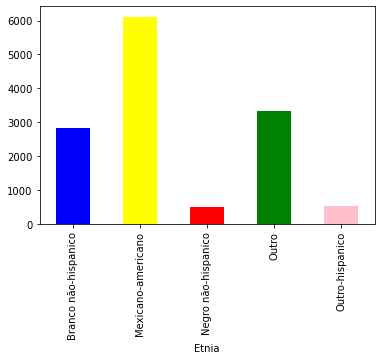

In [99]:
#cores
agrupEtnia.plot.bar(color = ['blue','yellow','red','green','pink','orange'])

In [71]:
# Agrupamento dos dados baseado no atributo 'RIAGENDR/PAG_MINW', contando e somando os registros
agrupGenAtiv = Df2.groupby(['RIAGENDR'])['PAG_MINW'].sum()
agrupGenAtiv


RIAGENDR
1    1.419528e+06
2    1.096870e+06
Name: PAG_MINW, dtype: float64

<AxesSubplot:xlabel='RIAGENDR'>

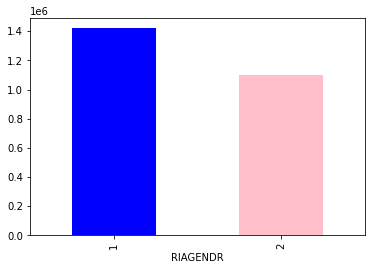

In [72]:
# Gráfico de barras
agrupGenAtiv.plot.bar(color = ['blue','pink'])

In [90]:
# Agrupamento dos dados baseado no atributo 'RIDAGEYR/PAG_MINW'', contando e somando os registros
agrupIdadeAtiv = Df2.groupby(['RIDAGEYR','RIAGENDR'])['PAG_MINW'].sum()
agrupIdadeAtiv


RIDAGEYR  RIAGENDR
Adult     1           505120.755196
          2           449278.577367
MidAge    1           432513.528868
          2           355671.870670
Senior    1           302777.914550
          2           171032.337182
Name: PAG_MINW, dtype: float64

<AxesSubplot:xlabel='RIDAGEYR,RIAGENDR'>

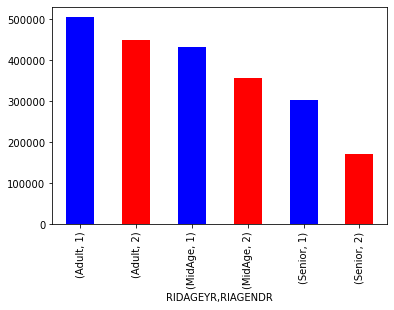

In [92]:
# Gráfico de barras
agrupIdadeAtiv.plot.bar(color = ['blue','red'])

In [77]:
# Agrupamento dos dados baseado no atributo 'REtnia/PAG_MINW'', contando e somando os registros
agrupEtniaAtiv = Df2.groupby(['Etnia'])['PAG_MINW'].sum()
agrupEtniaAtiv


Etnia
Branco não-hispanico    3.943370e+05
Mexicano-americano      1.247864e+06
Negro não-hispanico     7.516113e+04
Outro                   6.796582e+05
Outro-hispanico         1.193784e+05
Name: PAG_MINW, dtype: float64

<AxesSubplot:xlabel='Etnia'>

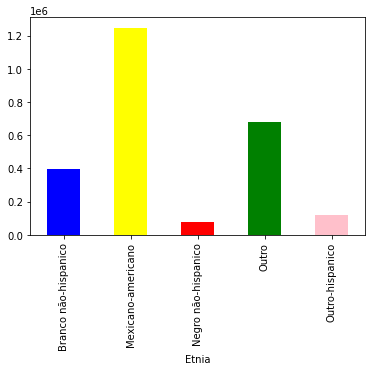

In [78]:
#cores
agrupEtniaAtiv.plot.bar(color = ['blue','yellow','red','green','pink','orange'])

In [109]:
 #Agrupamento dos dados baseado no atributo 'RIAGENDR/'HEI2015_TOTAL_SCORE contando e somando os registros
agrupGenTotscore = Df2.groupby(['RIAGENDR'])['HEI2015_TOTAL_SCORE'].sum()
agrupGenTotscore


RIAGENDR
1    118901.752127
2    133953.640380
Name: HEI2015_TOTAL_SCORE, dtype: float64

<AxesSubplot:xlabel='RIAGENDR'>

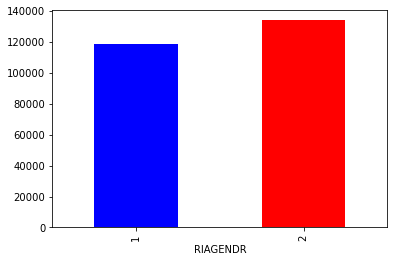

In [110]:
# Gráfico de barras
agrupGenTotscore.plot.bar(color = ['blue','red'])

In [111]:
# Agrupamento dos dados baseado no atributo 'RIDAGEYR/'HEI2015_TOTAL_SCORE, contando e somando os registros
agrupIdadetotscore = Df2.groupby(['RIDAGEYR'])['HEI2015_TOTAL_SCORE'].sum()
agrupIdadetotscore


RIDAGEYR
Adult     79989.235883
MidAge    88133.142698
Senior    72349.660587
Name: HEI2015_TOTAL_SCORE, dtype: float64

<AxesSubplot:xlabel='RIDAGEYR'>

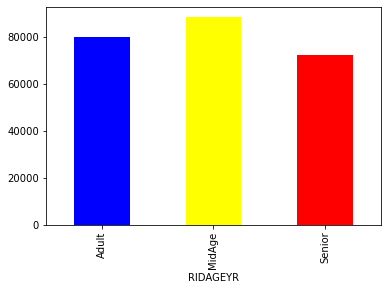

In [112]:
#cores
agrupIdadetotscore.plot.bar(color = ['blue','yellow','red'])

In [113]:
# Agrupamento dos dados baseado no atributo 'REtnia/PAG_MINW'', contando e somando os registros
agrupEtniatotscore = Df2.groupby(['Etnia'])['HEI2015_TOTAL_SCORE'].sum()
agrupEtniatotscore


Etnia
Branco não-hispanico     55070.608451
Mexicano-americano      120634.301164
Negro não-hispanico       7855.910538
Outro                    58635.591172
Outro-hispanico          10658.981183
Name: HEI2015_TOTAL_SCORE, dtype: float64

<AxesSubplot:xlabel='Etnia'>

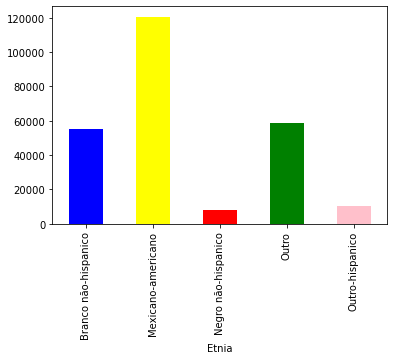

In [114]:
#cores
agrupEtniatotscore.plot.bar(color = ['blue','yellow','red','green','pink','orange'])

In [106]:
# Agrupamento dos dados baseado no atributo 'Graderenci_Pag/phq9 contando e somando os registros
agrupAtiv_phq9 = Df2.groupby(['Graderenci_Pag'])['phq9'].sum()
agrupAtiv_phq9

Graderenci_Pag
Aderencia acima       4833.0
Aderencia adequada    1915.0
Aderencia baixa       6575.0
Name: phq9, dtype: float64

<AxesSubplot:xlabel='Graderenci_Pag'>

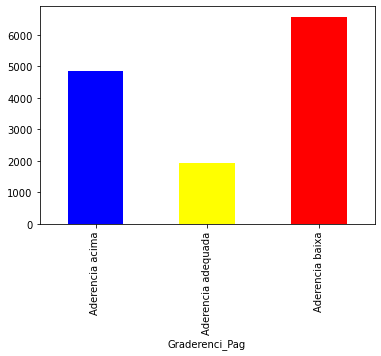

In [107]:
#cores
agrupAtiv_phq9.plot.bar(color = ['blue','yellow','red'])

In [120]:
# Agrupamento dos dados baseado no atributo 'Graderenci_Pag/phq9 contando e somando os registros
Heic1 = Df2.groupby(['phq_grp'])['HEI2015C1_TOTALVEG'].sum()
Heic1

phq_grp
Not Specified                       25.979944
Sem Sintomas                     13174.834190
Sintomas Leves                    2139.785904
Sintomas ModeradamenteSeveros      183.098430
Sintomas Moderados                 617.713671
Sintomas Severos                    71.277576
Name: HEI2015C1_TOTALVEG, dtype: float64

<AxesSubplot:xlabel='phq_grp'>

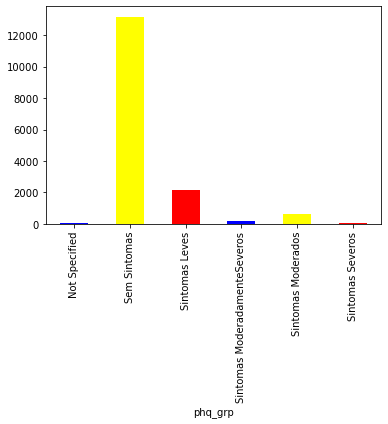

In [121]:
#cores
Heic1.plot.bar(color = ['blue','yellow','red'])